In [1]:
from data_loading import historical_sales
from time_series_analysis import time_serie
from data_segmentation import data_model2
from parameters_optimization import best_parameters_auto_arima2,generate_param_grid2
from packages import ForecasterSarimax,Sarimax,TimeSeriesFold,grid_search_sarimax


ruta=r'/home/sebastian/Documentos/programas/Forescast Work/sales_historical.csv'
df_sales_and_product= historical_sales(ruta)
df_filtrado = df_sales_and_product[
            (df_sales_and_product['Country'] == 'Mexico')
            &(df_sales_and_product['Category Group'] == 'Pliers')  
            ]
df_grouped = (
                    df_filtrado
                    .groupby(df_filtrado['Date'].dt.to_period('M'))['Total Sales']
                    .sum()
                    .reset_index()
                )
df_grouped['Date'] = df_grouped['Date'].dt.to_timestamp()
serie = df_grouped.set_index('Date')['Total Sales']
serie = serie.asfreq('MS') 

Se ejecuto correctamenteHistoricalSales
-------------------------------------------------------------------------------



In [2]:
serie

Date
2019-01-01    245102.00
2019-02-01    193397.00
2019-03-01    158370.00
2019-04-01    128294.00
2019-05-01     91071.00
                ...    
2024-06-01    152674.42
2024-07-01    174395.22
2024-08-01    210767.20
2024-09-01     91485.92
2024-10-01    135115.06
Freq: MS, Name: Total Sales, Length: 70, dtype: float64

In [3]:
from time_series_analysis import preprocess_series
diff_serie=preprocess_series(serie)
serie=diff_serie

Se ejecutó correctamente: preprocess_series
-------------------------------------------------------------------------------



In [4]:
serie

Date
2020-02-01    1.124303
2020-03-01   -0.774725
2020-04-01   -0.025594
2020-05-01    0.946452
2020-06-01   -1.550174
2020-07-01   -0.104347
2020-08-01    0.700035
2020-09-01   -0.155549
2020-10-01    1.081985
2020-11-01   -0.804257
2020-12-01    0.742656
2021-01-01   -0.368779
2021-02-01   -0.650826
2021-03-01    0.531336
2021-04-01    0.670574
2021-05-01   -0.973720
2021-06-01    0.842374
2021-07-01   -0.161342
2021-08-01   -0.078273
2021-09-01    0.052546
2021-10-01    0.019024
2021-11-01    0.141563
2021-12-01   -0.364884
2022-01-01    0.204211
2022-02-01   -0.202766
2022-03-01   -0.207305
2022-04-01   -0.377249
2022-05-01   -0.005028
2022-06-01    0.119481
2022-07-01    0.500287
2022-08-01    0.411995
2022-09-01   -0.378161
2022-10-01   -0.170197
2022-11-01    0.129983
2022-12-01    0.701455
2023-01-01   -0.187830
2023-02-01   -0.467856
2023-03-01    0.500902
2023-04-01    0.046969
2023-05-01    0.539640
2023-06-01   -0.691701
2023-07-01   -0.325959
2023-08-01   -0.345731
2023-0

In [5]:
type(serie)

pandas.core.series.Series

In [6]:
from data_segmentation import data_model2
train_data,test_data = data_model2(serie) # Usando la función data_model2


Se ejecuto correctamente: data_model2
-------------------------------------------------------------------------------



In [7]:
from parameters_optimization import best_parameters_auto_arima,generate_param_grid
best_params_arima,best_seasonal_params_arima=best_parameters_auto_arima(serie)
param_grid=generate_param_grid(best_params_arima,best_seasonal_params_arima)

Se ejecuto correctamente: generate_param_grid
-------------------------------------------------------------------------------



In [8]:
len(param_grid)

3

In [9]:
from sari import grid_search_sarimax_train
resultados_grid=grid_search_sarimax_train(train_data,param_grid)

Number of models compared: 1311.


params grid:   0%|          | 0/1311 [00:00<?, ?it/s]

In [10]:
from sari import best_params_sarimax
top_params=best_params_sarimax(resultados_grid, top_n=10)

In [11]:
top_params

[{'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 2, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 2, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 1, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 1, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 0, 12)},
 {'order': (2, 0, 1), 'seasonal_order': (2, 0, 0, 12)},
 {'order': (1, 0, 3), 'seasonal_order': (1, 0, 0, 12)}]

In [12]:
from sari import predictions_train
resultados,mejores_resultados=predictions_train(serie, top_params)

{'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.36115014358376335
se actualizaron resultados:0.36115014358376335-{'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)}
{'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.36115014358376335
{'order': (2, 0, 1), 'seasonal_order': (1, 0, 1, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.36115014358376335
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 2, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.48969275409010177
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 2, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.48969275409010177
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 1, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.48543400837094286
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 1, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.48543400837094286
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.4893893381481833
{'order': (2, 0, 1), 'seasonal_order': (2, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.4893893381481833
{'order': (1, 0, 3), 'seasonal_order': (1, 0, 0, 12)}


  0%|          | 0/3 [00:00<?, ?it/s]

resultado [0]:0.3461330364595077
se actualizaron resultados:0.3461330364595077-{'order': (1, 0, 3), 'seasonal_order': (1, 0, 0, 12)}


In [13]:
resultados


(   mean_absolute_error
 0             0.346133,
                 pred
 2021-11-01 -0.109180
 2021-12-01 -0.383928
 2022-01-01  0.246062
 2022-02-01  0.295388
 2022-03-01 -0.250718
 2022-04-01 -0.344395
 2022-05-01  0.492505
 2022-06-01 -0.424613
 2022-07-01  0.081986
 2022-08-01  0.038724
 2022-09-01 -0.026084
 2022-10-01 -0.009682
 2022-11-01  0.066255
 2022-12-01  0.011608
 2023-01-01  0.000550
 2023-02-01  0.001474
 2023-03-01  0.010996
 2023-04-01  0.010004
 2023-05-01  0.002232
 2023-06-01 -0.005562
 2023-07-01 -0.015963
 2023-08-01 -0.014817
 2023-09-01  0.013449
 2023-10-01  0.005388
 2023-11-01  0.233663
 2023-12-01 -0.741726
 2024-01-01  0.418587
 2024-02-01  0.127691
 2024-03-01 -0.162461
 2024-04-01 -0.280010
 2024-05-01 -0.208865
 2024-06-01  0.340701
 2024-07-01  0.488175
 2024-08-01  0.069941
 2024-09-01 -0.255303
 2024-10-01  0.123347)

In [14]:
mejores_resultados

{'params': {'order': (1, 0, 3), 'seasonal_order': (1, 0, 0, 12)},
 'mae': 0.3461330364595077}

In [15]:

def predictions_final_model(serie, mejores_resultados):
        """
        Ajusta el modelo final con los mejores parámetros y realiza predicciones.
        """
        forecaster = ForecasterSarimax(
            regressor=Sarimax(
                order=mejores_resultados['params']['order'],
                seasonal_order=mejores_resultados['params']['seasonal_order'],
                #trend=mejores_resultados['params'].get('trend', None),
                maxiter=500
            )
        )

        # Ajustar el modelo final
        forecaster.fit(serie)
        
        # Realizar predicciones
        predicciones = forecaster.predict(steps=12)
        return predicciones


In [16]:
predicciones=predictions_final_model(serie, mejores_resultados)

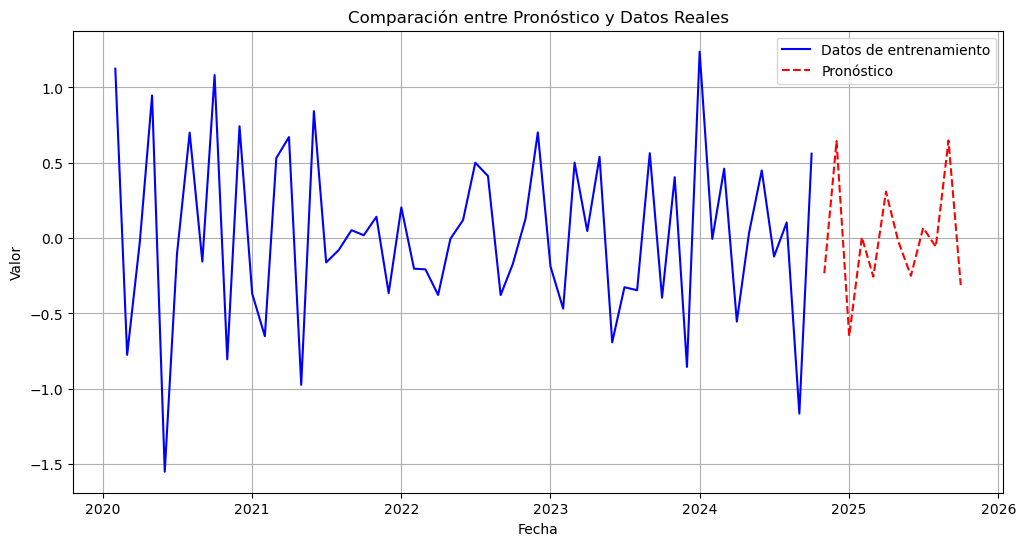

In [17]:
from packages import plt
 # Gráfico de comparación
plt.figure(figsize=(12, 6))
plt.plot(serie, label='Datos de entrenamiento', color='blue')
plt.plot(predicciones, label='Pronóstico', color='red', linestyle='dashed')
plt.legend()
plt.title('Comparación entre Pronóstico y Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid()
plt.show()